# Predicting fraud in auto insurance claims & pattern extraction


# Problem Statement

The challenge is to use this information to build a predictive model that can accurately predict the "Fraud in auto insurance claims" and "pattern extraction" based on their characteristics.

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import pickle

# Loading Train Datasets

### 1.Loading Train_Demographics Dataset

In [2]:
demo = pd.read_csv('Train_Demographics.csv',na_values=['NA'])

In [3]:
demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [5]:
demo.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,28836.0,38.815370,7.996377,19.0,33.0,38.0,44.0,64.0
InsuredZipCode,28836.0,502436.579068,72250.868871,430104.0,448603.0,466691.0,603848.0,620962.0
CapitalGains,28836.0,23066.569566,27637.813724,0.0,0.0,0.0,49000.0,100500.0
CapitalLoss,28836.0,-24940.612429,27913.209608,-111100.0,-50000.0,0.0,0.0,0.0


In [6]:
demo.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country'],
      dtype='object')

In [7]:
demo.shape

(28836, 10)

In [8]:
demo.isnull().sum()

CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

In [9]:
print(demo['InsuredGender'].value_counts())
print(demo['Country'].value_counts())

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64
India    28834
Name: Country, dtype: int64


In [10]:
demo[['InsuredGender','Country']] = demo[['InsuredGender','Country']].fillna(demo.mode().iloc[0])
print(demo.isnull().sum())

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64


### 2.Loading Train_Claim Dataset

In [11]:
claim = pd.read_csv('Train_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])

In [12]:
claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


In [13]:
# Convert the DateOfPolicyCoverage column to datetime format
claim['DateOfIncident'] = pd.to_datetime(claim['DateOfIncident'])

# Extract year, month, and day as separate columns
claim['Year'] = claim['DateOfIncident'].dt.year
claim['Month'] = claim['DateOfIncident'].dt.month
claim['Day'] = claim['DateOfIncident'].dt.day
claim.drop('DateOfIncident', axis=1, inplace=True)

In [14]:
# rename attributes
claim = claim.rename(columns={"Year": "YearOfIncident", "Month": "MonthOfIncident", "Day": "DayOfIncident"})

In [15]:
claim.shape

(28836, 21)

In [16]:
claim.head().T

,0,1,2,3,4
CustomerID,Cust10000,Cust10001,Cust10002,Cust10003,Cust10004
TypeOfIncident,Multi-vehicle Collision,Multi-vehicle Collision,Single Vehicle Collision,Single Vehicle Collision,Single Vehicle Collision
TypeOfCollission,Side Collision,Side Collision,Side Collision,Side Collision,Rear Collision
SeverityOfIncident,Total Loss,Total Loss,Minor Damage,Minor Damage,Minor Damage
AuthoritiesContacted,Police,Police,Other,Other,Fire
IncidentState,State7,State7,State8,State9,State8
IncidentCity,City1,City5,City6,City6,City6
IncidentAddress,Location 1311,Location 1311,Location 2081,Location 2081,Location 1695
IncidentTime,17.0,10.0,22.0,22.0,10.0
NumberOfVehicles,3,3,1,1,1


In [17]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   TypeOfIncident         28836 non-null  object 
 2   TypeOfCollission       23674 non-null  object 
 3   SeverityOfIncident     28836 non-null  object 
 4   AuthoritiesContacted   28836 non-null  object 
 5   IncidentState          28836 non-null  object 
 6   IncidentCity           28836 non-null  object 
 7   IncidentAddress        28836 non-null  object 
 8   IncidentTime           28805 non-null  float64
 9   NumberOfVehicles       28836 non-null  int64  
 10  PropertyDamage         18377 non-null  object 
 11  BodilyInjuries         28836 non-null  int64  
 12  Witnesses              28790 non-null  float64
 13  PoliceReport           19031 non-null  object 
 14  AmountOfTotalClaim     28786 non-null  float64
 15  Am

In [18]:
claim.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident
count,28805.000000,28836.000000,28836.000000,28790.00000,28786.000000,28836.000000,28836.000000,28836.000000,28836.0,28836.000000,28836.000000
mean,11.764069,1.823207,0.985782,1.48826,52308.545473,7337.118428,7283.870197,37687.129387,2015.0,1.495110,15.010300
std,6.148869,0.980099,0.784764,1.04079,25101.172550,4427.638593,4375.842738,17977.048232,0.0,0.516162,7.603878
min,0.000000,1.000000,0.000000,0.00000,150.000000,0.000000,0.000000,109.000000,2015.0,1.000000,1.000000
25%,6.000000,1.000000,0.000000,1.00000,44643.750000,4743.750000,4862.000000,32193.250000,2015.0,1.000000,9.000000
50%,12.000000,1.000000,1.000000,1.00000,58360.000000,7147.000000,7051.000000,42457.500000,2015.0,1.000000,15.000000
75%,17.000000,3.000000,2.000000,2.00000,68982.750000,10571.250000,10327.000000,49535.750000,2015.0,2.000000,21.000000
max,23.000000,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000,2015.0,3.000000,31.000000


In [19]:
claim.columns

Index(['CustomerID', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'YearOfIncident', 'MonthOfIncident',
       'DayOfIncident'],
      dtype='object')

In [20]:
claim.isnull().sum()

CustomerID                   0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
YearOfIncident               0
MonthOfIncident              0
DayOfIncident                0
dtype: int64

In [21]:
for col in ['TypeOfCollission', 'IncidentTime', 'PropertyDamage', 'Witnesses', 'PoliceReport']:
    print(claim[col].value_counts())


Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64
16.0    1616
17.0    1615
6.0     1564
15.0    1541
14.0    1461
5.0     1434
13.0    1420
18.0    1419
4.0     1406
12.0    1363
7.0     1331
11.0    1286
19.0    1280
8.0     1251
3.0     1232
9.0     1210
10.0    1165
20.0    1153
21.0     971
22.0     809
2.0      713
1.0      648
23.0     526
0.0      391
Name: IncidentTime, dtype: int64
NO     9687
YES    8690
Name: PropertyDamage, dtype: int64
2.0    8449
1.0    8345
0.0    6128
3.0    5868
Name: Witnesses, dtype: int64
NO     9898
YES    9133
Name: PoliceReport, dtype: int64


In [22]:
claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']] = claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']].fillna(claim.mode().iloc[0])
claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']] = claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']].fillna(claim.median())
claim.isnull().sum()

CustomerID               0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
YearOfIncident           0
MonthOfIncident          0
DayOfIncident            0
dtype: int64

### 3.Loading Train_Policy Dataset

In [23]:
policy = pd.read_csv('Train_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])

In [24]:
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [25]:
# Convert the DateOfPolicyCoverage column to datetime format
policy['DateOfPolicyCoverage'] = pd.to_datetime(policy['DateOfPolicyCoverage'])

# Extract year, month, and day as separate columns
policy['Year'] = policy['DateOfPolicyCoverage'].dt.year
policy['Month'] = policy['DateOfPolicyCoverage'].dt.month
policy['Day'] = policy['DateOfPolicyCoverage'].dt.day
policy.drop('DateOfPolicyCoverage', axis=1, inplace=True)

In [26]:
# rename attributes
policy = policy.rename(columns={"Year": "YearOfPolicyCoverage", "Month": "MonthOfPolicyCoverage", "Day": "DayOfPolicyCoverage"})

In [27]:
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
0,110122,328,State3,250/500,1000,1406.91,0,husband,Cust1001,2014,10,17
1,110125,256,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,1990,5,25
2,110126,228,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,2014,6,6
3,110127,256,State3,250/500,1000,1351.10,0,unmarried,Cust1006,2006,10,12
4,110128,137,State2,250/500,1000,1333.35,0,husband,Cust1007,2000,6,4


In [28]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   InsurancePolicyState        28836 non-null  object 
 3   Policy_CombinedSingleLimit  28836 non-null  object 
 4   Policy_Deductible           28836 non-null  int64  
 5   PolicyAnnualPremium         28695 non-null  float64
 6   UmbrellaLimit               28836 non-null  int64  
 7   InsuredRelationship         28836 non-null  object 
 8   CustomerID                  28836 non-null  object 
 9   YearOfPolicyCoverage        28836 non-null  int64  
 10  MonthOfPolicyCoverage       28836 non-null  int64  
 11  DayOfPolicyCoverage         28836 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.6+ MB


In [29]:
policy.describe()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
count,28836.000000,28836.000000,28836.000000,28695.000000,2.883600e+04,28836.000000,28836.000000,28836.000000
mean,129312.517097,203.067867,1114.282529,1261.702646,9.836680e+05,2001.505063,6.557602,15.447982
std,11114.060267,99.932951,546.632816,205.385158,1.969282e+06,6.564636,3.137104,7.690441
min,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1990.000000,1.000000,1.000000
25%,119698.750000,126.000000,622.000000,1124.425000,0.000000e+00,1996.000000,4.000000,9.000000
50%,129278.500000,199.000000,1000.000000,1266.440000,0.000000e+00,2001.000000,7.000000,16.000000
75%,138933.250000,267.000000,1627.000000,1397.200000,4.859610e+05,2007.000000,9.000000,22.000000
max,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000,12.000000,31.000000


In [30]:
policy.columns

Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'InsuredRelationship', 'CustomerID', 'YearOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'DayOfPolicyCoverage'],
      dtype='object')

In [31]:
policy.shape

(28836, 12)

In [32]:
policy.isnull().sum()

InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           141
UmbrellaLimit                   0
InsuredRelationship             0
CustomerID                      0
YearOfPolicyCoverage            0
MonthOfPolicyCoverage           0
DayOfPolicyCoverage             0
dtype: int64

In [33]:
print(policy['PolicyAnnualPremium'].value_counts())

1310.77    7
1310.78    6
1226.29    5
1285.77    5
1265.59    5
          ..
1131.23    1
1446.95    1
1184.71    1
1052.28    1
1062.91    1
Name: PolicyAnnualPremium, Length: 23851, dtype: int64


### 4.Loading Train_Vehicle Dataset

In [34]:
vec = pd.read_csv('Train_Vehicle.csv',na_values=['???'])

In [35]:
vec.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [36]:
vec = vec.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [37]:
vec.columns = vec.columns.droplevel(0) 
vec.columns.name = None               
vec = vec.reset_index()

In [38]:
vec.head()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010


In [39]:
vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleID     28836 non-null  object
 2   VehicleMake   28786 non-null  object
 3   VehicleModel  28836 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [40]:
vec.describe()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
count,28836,28836,28786,28836,28836
unique,28836,28836,14,39,21
top,Cust10000,Vehicle26917,Saab,RAM,2007
freq,1,1,2415,1344,1730


In [41]:
vec.columns

Index(['CustomerID', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object')

In [42]:
vec.shape

(28836, 5)

In [43]:
vec.isnull().sum()

CustomerID       0
VehicleID        0
VehicleMake     50
VehicleModel     0
VehicleYOM       0
dtype: int64

In [44]:
vec['VehicleMake'].value_counts()

Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Audi          1952
Jeep          1946
Mercedes      1659
Honda         1493
Name: VehicleMake, dtype: int64

In [45]:
vec[['VehicleMake']] = vec[['VehicleMake']].fillna(vec.mode().iloc[0])
print(vec.isnull().sum())

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64


### 5.Loading Traindata_with_Target Dataset

In [46]:
fraud = pd.read_csv('Traindata_with_Target.csv')

In [47]:
fraud.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [48]:
fraud.shape

(28836, 2)

In [49]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


In [50]:
fraud.describe()

,CustomerID,ReportedFraud
count,28836,28836
unique,28836,2
top,Cust20065,N
freq,1,21051


In [51]:
fraud.columns

Index(['CustomerID', 'ReportedFraud'], dtype='object')

In [52]:
fraud.shape

(28836, 2)

In [53]:
fraud.isnull().sum()

CustomerID       0
ReportedFraud    0
dtype: int64

# Mergeing Datasets

In [54]:
# merge the datasets on a common variable
dc_df = pd.merge(demo,claim, on='CustomerID')


In [55]:
pv_df = pd.merge(policy,vec, on='CustomerID')


In [56]:
fd_df = pd.merge(dc_df,pv_df,on='CustomerID' )

In [57]:
train_df =  pd.merge(fd_df,fraud,on='CustomerID' )

In [58]:
# Save the dataframe as a new CSV file
train_df.to_csv('data_train.csv', index=False)
train_df = pd.read_csv('data_train.csv')

In [59]:
CustomerID = train_df["CustomerID"] # store the "CustomerID" column in a separate variable
train_df.drop("CustomerID", axis=1, inplace=True) # drop the "CustomerID" column from the "test_df" DataFrame
train_df.to_csv('Train_df',index=False)
trained_df = pd.read_csv('Train_df')

##  2.1 Preprocessing Merged Data

In [60]:
trained_df.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,...,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,Multi-vehicle Collision,...,0,not-in-family,1998,10,25,Vehicle26917,Audi,A5,2008,N
1,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,Multi-vehicle Collision,...,0,not-in-family,2000,11,15,Vehicle15893,Audi,A5,2006,N
2,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,Single Vehicle Collision,...,0,wife,2001,2,12,Vehicle5152,Volkswagen,Jetta,1999,N
3,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,Single Vehicle Collision,...,0,own-child,2005,4,11,Vehicle37363,Volkswagen,Jetta,2003,N
4,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,Single Vehicle Collision,...,4279863,unmarried,1996,10,25,Vehicle28633,Toyota,CRV,2010,N


In [61]:
trained_df.tail()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,...,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
28831,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India,Vehicle Theft,...,0,unmarried,1998,4,18,Vehicle13568,Suburu,Impreza,2007,N
28832,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India,Single Vehicle Collision,...,0,unmarried,2004,9,7,Vehicle19810,Jeep,Wrangler,2003,N
28833,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India,Single Vehicle Collision,...,3448735,own-child,1998,9,10,Vehicle3339,Suburu,Legacy,2004,N
28834,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,Single Vehicle Collision,...,3364301,not-in-family,1998,8,10,Vehicle10240,Suburu,Forrestor,2004,N
28835,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,Single Vehicle Collision,...,2909175,husband,2003,4,12,Vehicle39163,Suburu,E400,2007,N


In [62]:
trained_df.shape

(28836, 45)

In [63]:
trained_df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,...,DayOfIncident,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleYOM
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,...,28836.000000,28836.000000,28836.000000,28836.000000,28695.000000,2.883600e+04,28836.000000,28836.000000,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,11.764322,1.823207,0.985782,1.487481,52319.038355,7337.118428,...,15.010300,129312.517097,203.067867,1114.282529,1261.702646,9.836680e+05,2001.505063,6.557602,15.447982,2005.093113
std,7.996377,72250.868871,27637.813724,27913.209608,6.145568,0.980099,0.784764,1.040142,25080.664083,4427.638593,...,7.603878,11114.060267,99.932951,546.632816,205.385158,1.969282e+06,6.564636,3.137104,7.690441,5.309956
min,19.000000,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,...,1.000000,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1990.000000,1.000000,1.000000,1995.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,6.000000,1.000000,0.000000,1.000000,44686.250000,4743.750000,...,9.000000,119698.750000,126.000000,622.000000,1124.425000,0.000000e+00,1996.000000,4.000000,9.000000,2001.000000
50%,38.000000,466691.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,58360.000000,7147.000000,...,15.000000,129278.500000,199.000000,1000.000000,1266.440000,0.000000e+00,2001.000000,7.000000,16.000000,2005.000000
75%,44.000000,603848.000000,49000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,68961.750000,10571.250000,...,21.000000,138933.250000,267.000000,1627.000000,1397.200000,4.859610e+05,2007.000000,9.000000,22.000000,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,...,31.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000,12.000000,31.000000,2015.000000


In [64]:
trained_df.columns

Index(['InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'YearOfIncident',
       'MonthOfIncident', 'DayOfIncident', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'YearOfPolicyCoverage', 'MonthOfPolicyCoverage', 'DayOfPolicyCoverage',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud'],
      dtype='objec

In [65]:
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsuredAge                  28836 non-null  int64  
 1   InsuredZipCode              28836 non-null  int64  
 2   InsuredGender               28836 non-null  object 
 3   InsuredEducationLevel       28836 non-null  object 
 4   InsuredOccupation           28836 non-null  object 
 5   InsuredHobbies              28836 non-null  object 
 6   CapitalGains                28836 non-null  int64  
 7   CapitalLoss                 28836 non-null  int64  
 8   Country                     28836 non-null  object 
 9   TypeOfIncident              28836 non-null  object 
 10  TypeOfCollission            28836 non-null  object 
 11  SeverityOfIncident          28836 non-null  object 
 12  AuthoritiesContacted        28836 non-null  object 
 13  IncidentState               288

### Checking for missing value

In [66]:
trained_df.isnull().sum().sum()

141

######  Replace missing value

In [67]:
# Replace missing values with the most common value for each column
for col in trained_df.columns:
    if trained_df[col].dtype == 'object':
        trained_df[col].fillna(trained_df[col].mode()[0], inplace=True)
    else:
        trained_df[col].fillna(trained_df[col].median(), inplace=True)


In [68]:
trained_df.isnull().sum().sum()

0

In [69]:
trained_df.dtypes


InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
YearOfIncide

###### Displaying both Numerical and Categorical columns

In [70]:
numerical_cols = trained_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = trained_df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:")
for col in numerical_cols:
    print(f"{col} ({trained_df[col].dtype})")

print("\n Categorical columns:")
for col in categorical_cols:
    print(f"{col} ({trained_df[col].dtype})")


Numerical columns:
InsuredAge (int64)
InsuredZipCode (int64)
CapitalGains (int64)
CapitalLoss (int64)
IncidentTime (float64)
NumberOfVehicles (int64)
BodilyInjuries (int64)
Witnesses (float64)
AmountOfTotalClaim (float64)
AmountOfInjuryClaim (int64)
AmountOfPropertyClaim (int64)
AmountOfVehicleDamage (int64)
YearOfIncident (int64)
MonthOfIncident (int64)
DayOfIncident (int64)
InsurancePolicyNumber (int64)
CustomerLoyaltyPeriod (int64)
Policy_Deductible (int64)
PolicyAnnualPremium (float64)
UmbrellaLimit (int64)
YearOfPolicyCoverage (int64)
MonthOfPolicyCoverage (int64)
DayOfPolicyCoverage (int64)
VehicleYOM (int64)

 Categorical columns:
InsuredGender (object)
InsuredEducationLevel (object)
InsuredOccupation (object)
InsuredHobbies (object)
Country (object)
TypeOfIncident (object)
TypeOfCollission (object)
SeverityOfIncident (object)
AuthoritiesContacted (object)
IncidentState (object)
IncidentCity (object)
IncidentAddress (object)
PropertyDamage (object)
PoliceReport (object)
Insuranc

###### Finding the unique values of all categorical columns

In [71]:
# Select categorical columns (object data type)
cat_cols = trained_df.select_dtypes(include=["object"])

# Loop through each categorical column and print unique values
for col in cat_cols:
    print(f"Unique values for column '{col}':")
    print(trained_df[col].unique())
    print()

Unique values for column 'InsuredGender':
['MALE' 'FEMALE']

Unique values for column 'InsuredEducationLevel':
['JD' 'High School' 'Masters' 'MD' 'Associate' 'College' 'PhD']

Unique values for column 'InsuredOccupation':
['armed-forces' 'tech-support' 'exec-managerial' 'adm-clerical'
 'handlers-cleaners' 'craft-repair' 'prof-specialty' 'other-service'
 'priv-house-serv' 'protective-serv' 'farming-fishing' 'sales'
 'transport-moving' 'machine-op-inspct']

Unique values for column 'InsuredHobbies':
['movies' 'cross-fit' 'polo' 'dancing' 'sleeping' 'camping' 'golf'
 'paintball' 'base-jumping' 'yachting' 'basketball' 'hiking'
 'bungie-jumping' 'exercise' 'board-games' 'reading' 'skydiving'
 'video-games' 'kayaking' 'chess']

Unique values for column 'Country':
['India']

Unique values for column 'TypeOfIncident':
['Multi-vehicle Collision' 'Single Vehicle Collision' 'Parked Car'
 'Vehicle Theft']

Unique values for column 'TypeOfCollission':
['Side Collision' 'Rear Collision' 'Front Colli

### Plotting Histplot and Boxplot with Respect to Traget

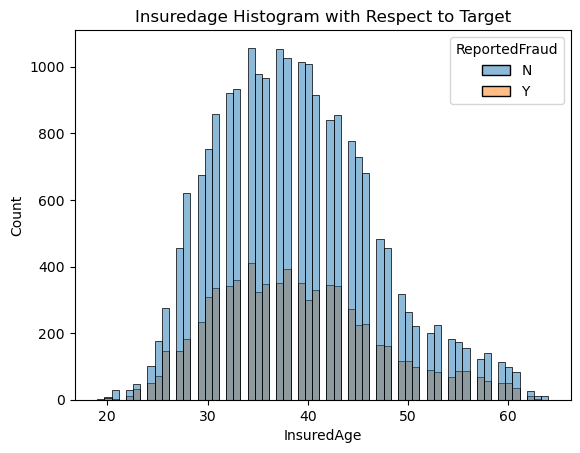

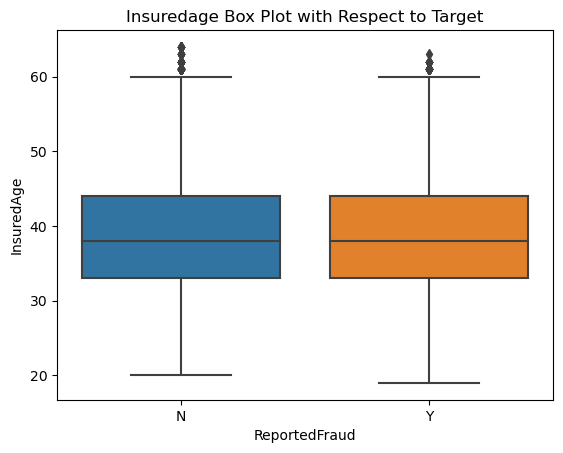

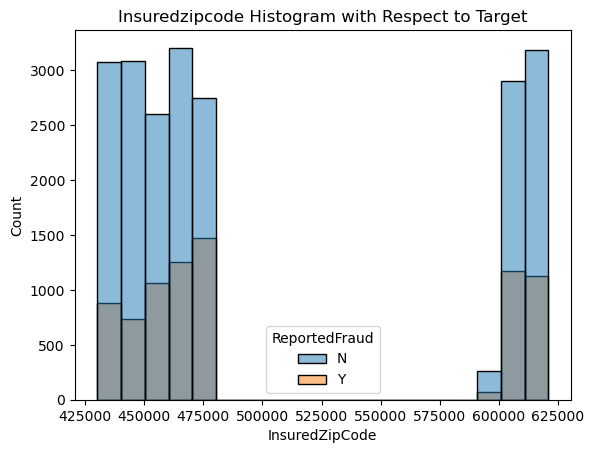

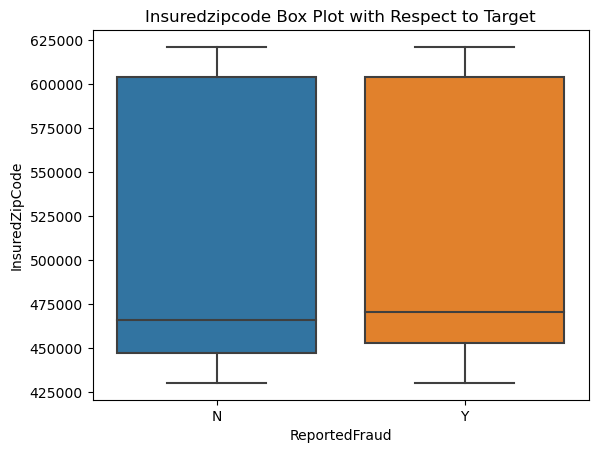

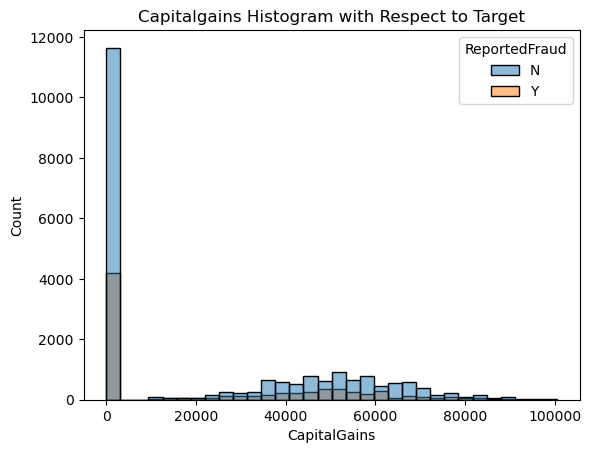

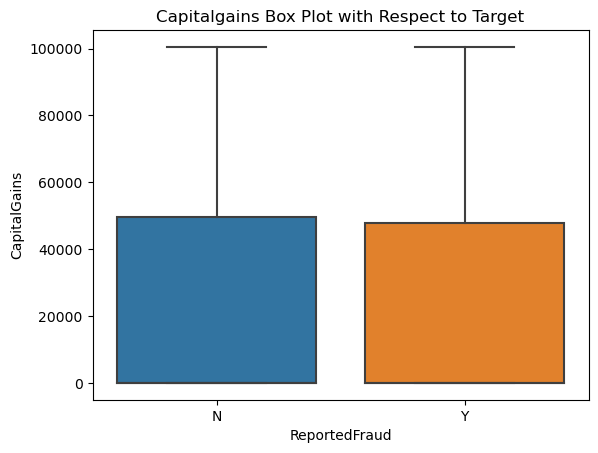

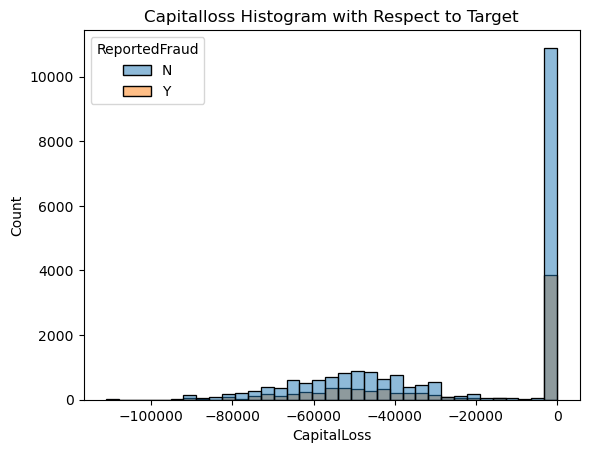

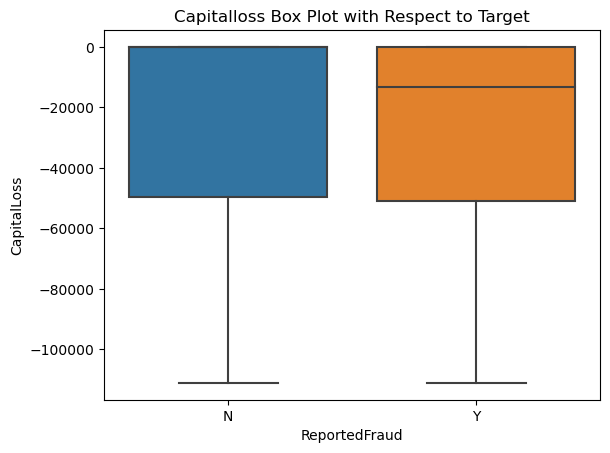

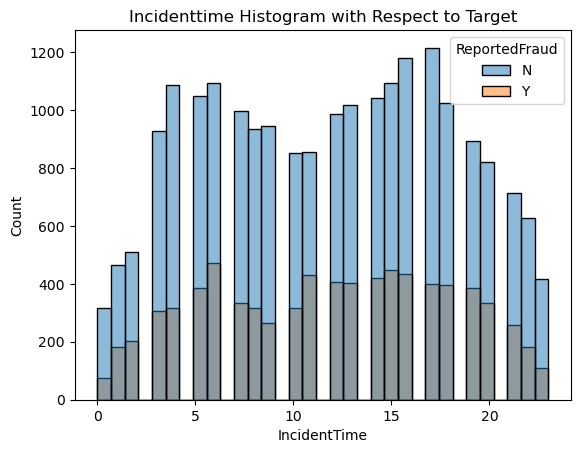

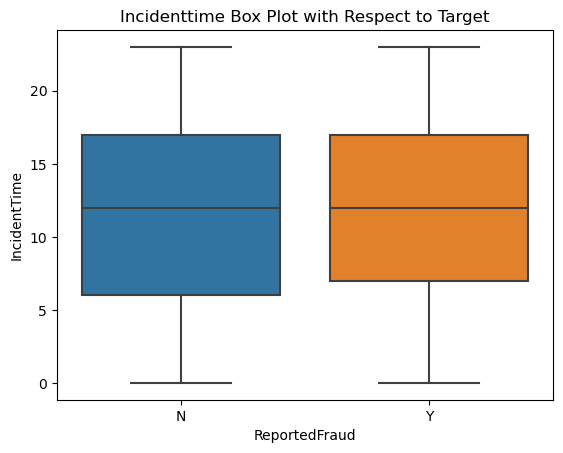

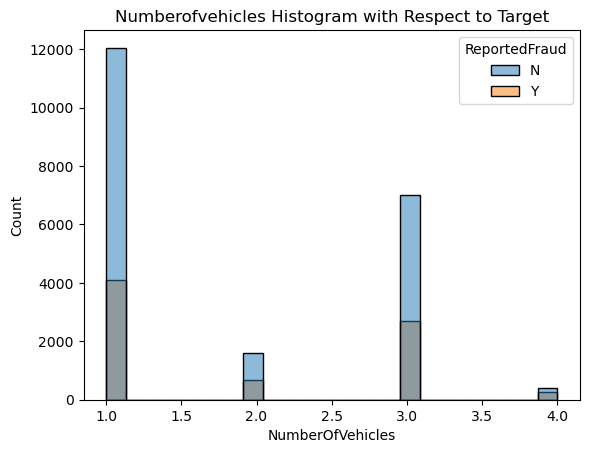

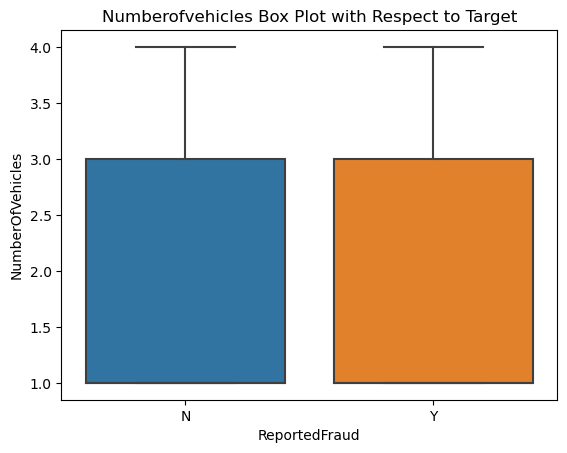

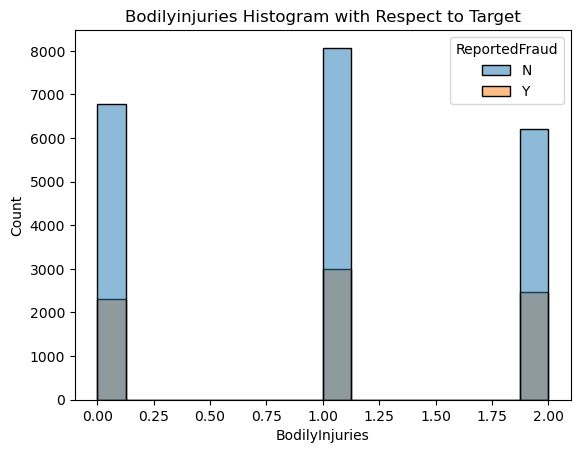

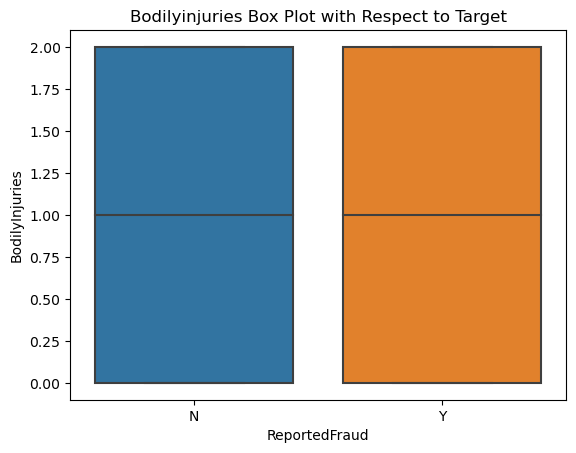

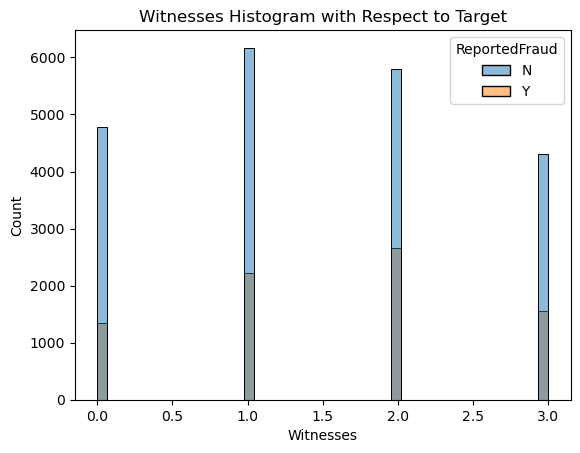

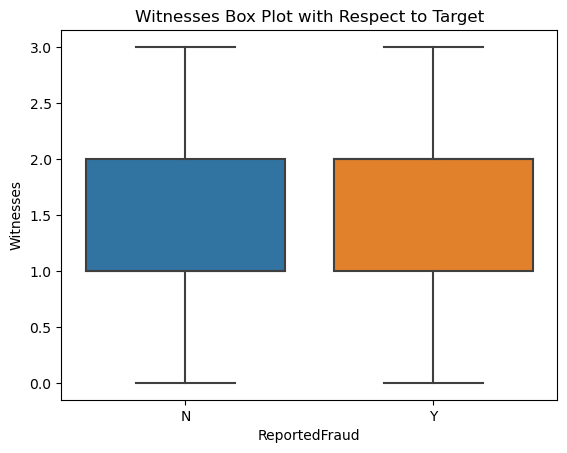

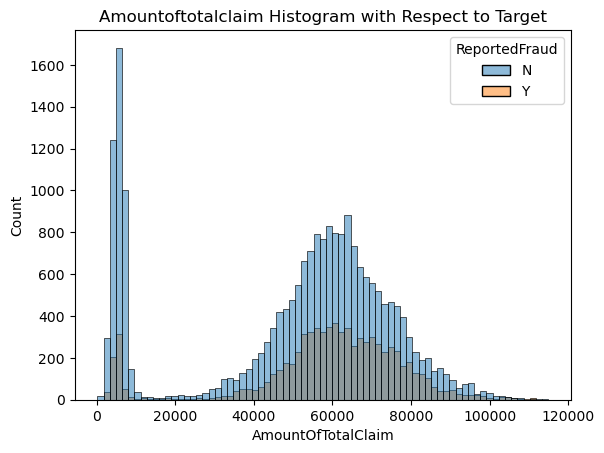

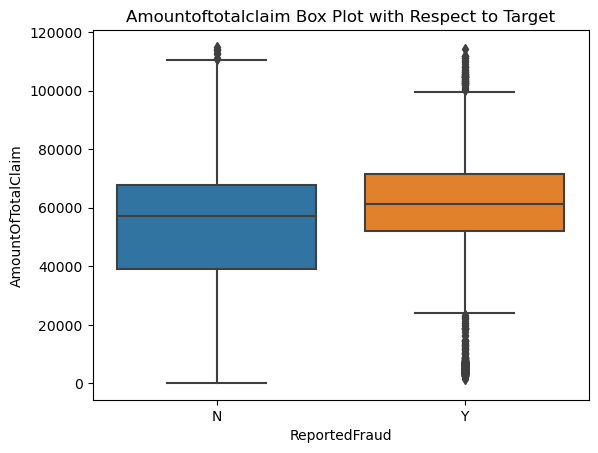

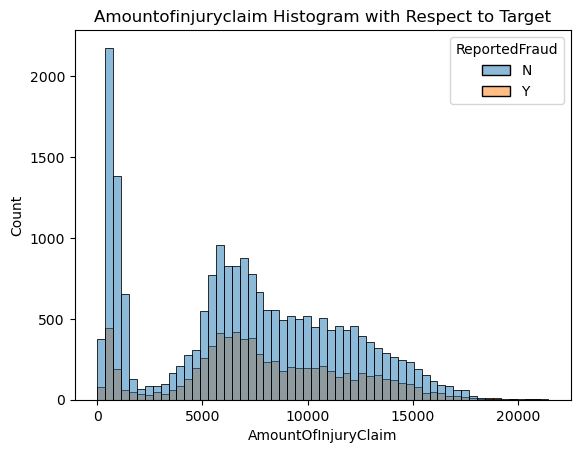

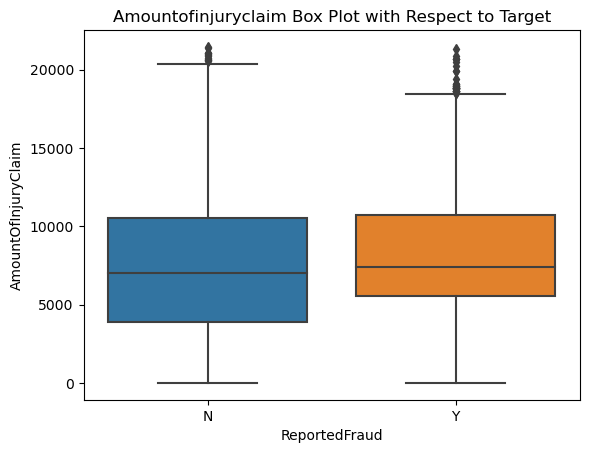

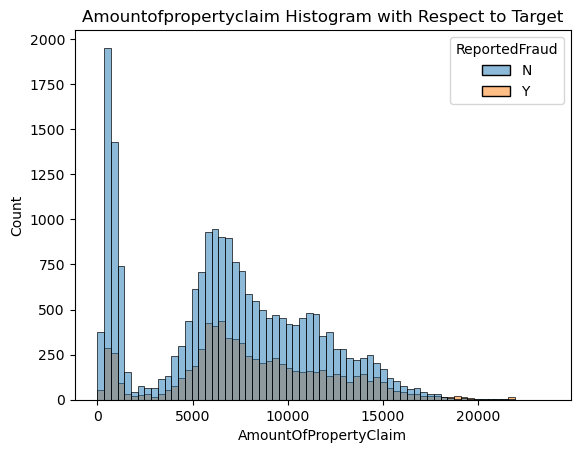

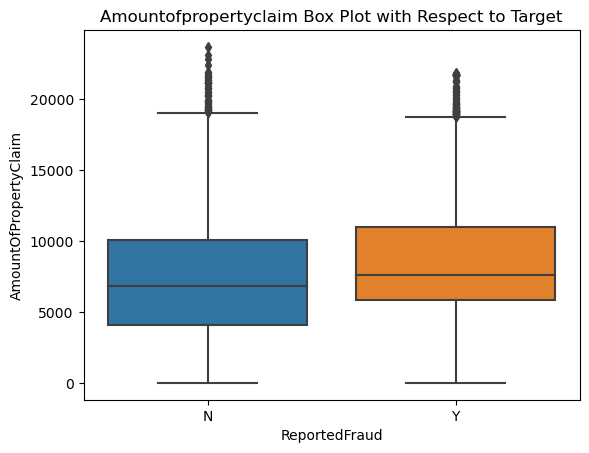

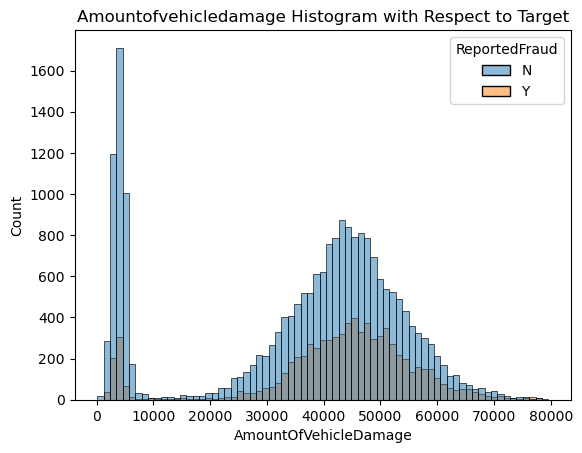

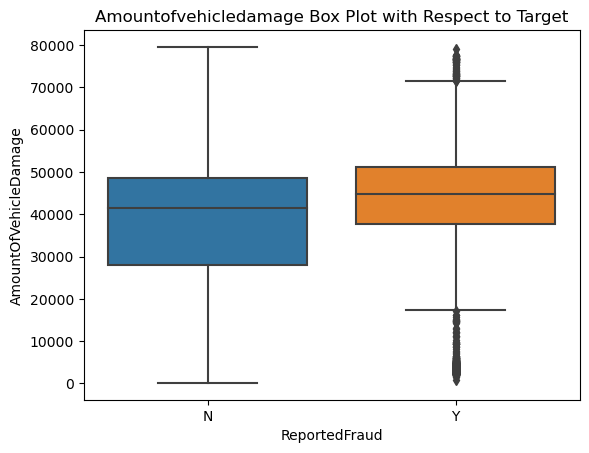

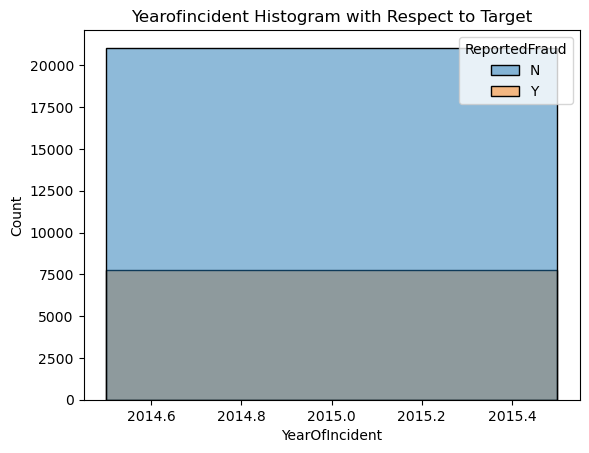

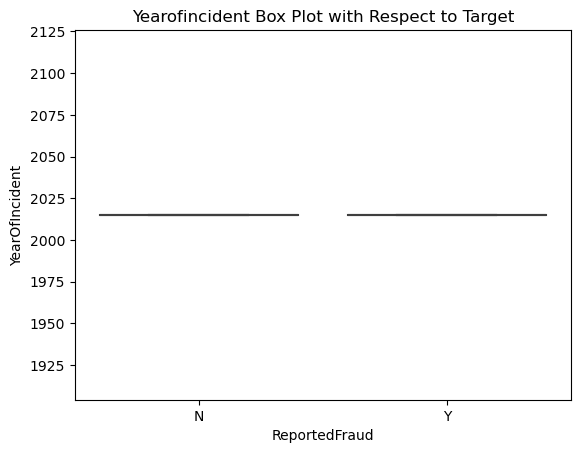

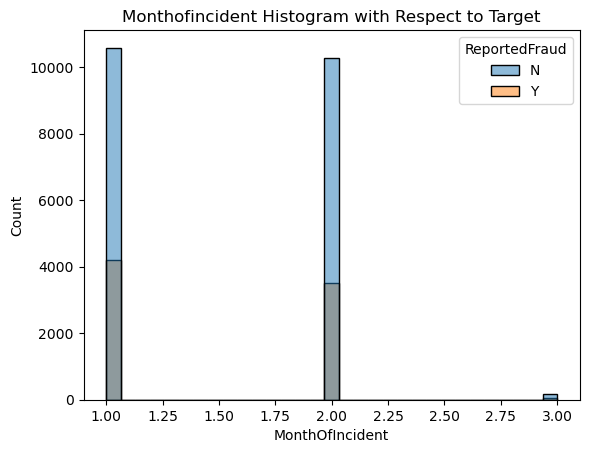

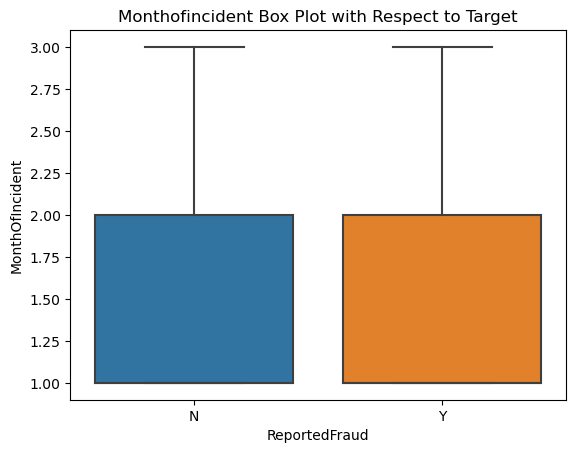

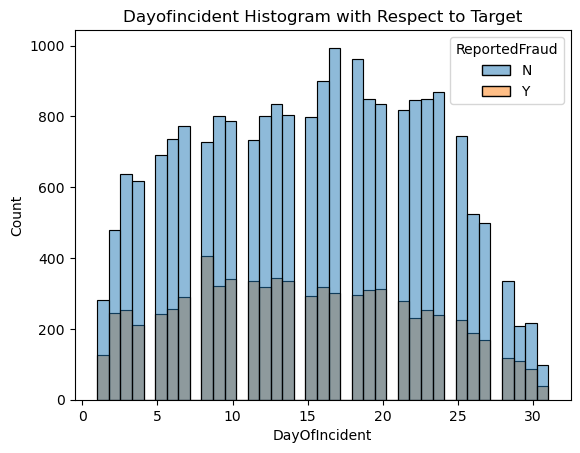

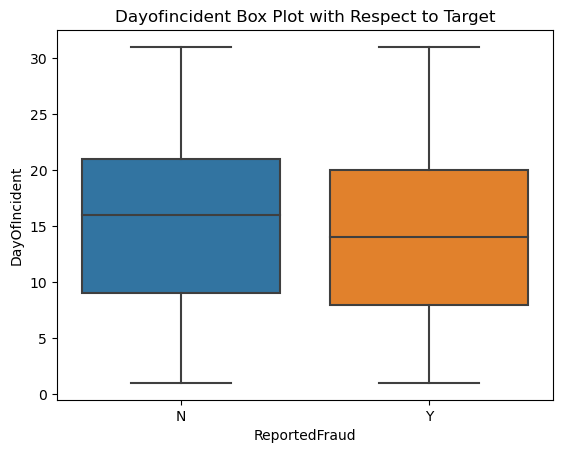

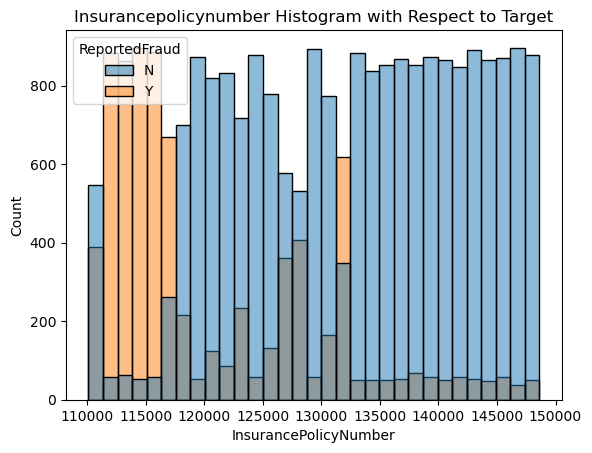

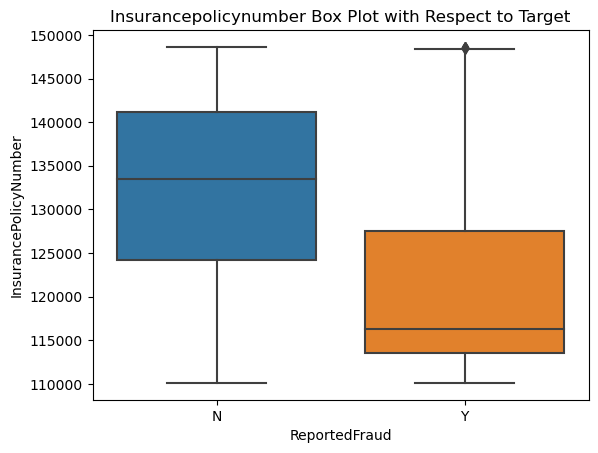

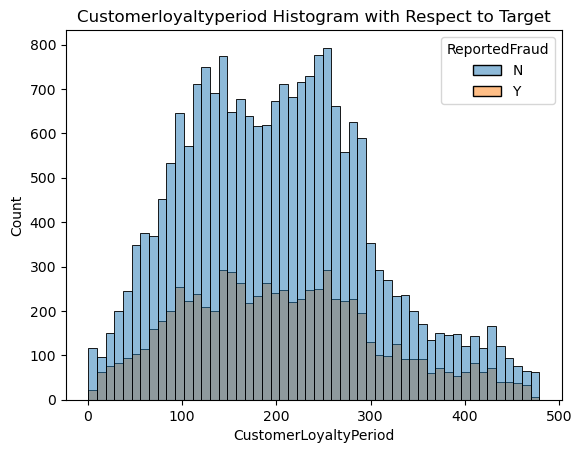

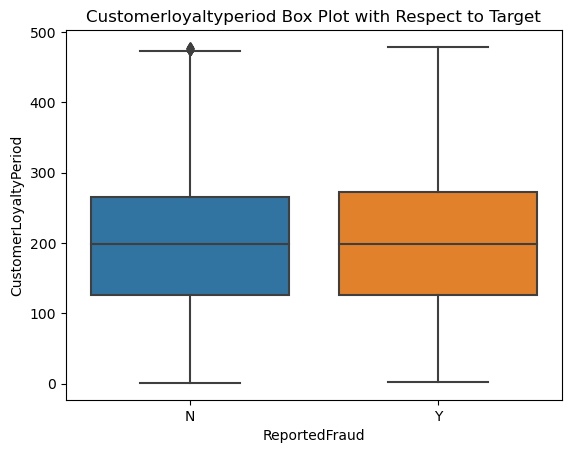

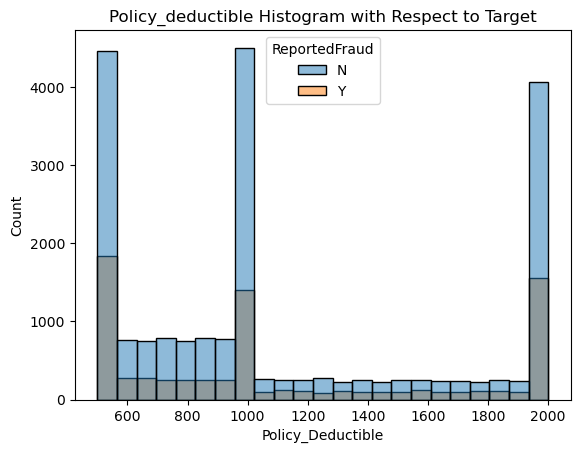

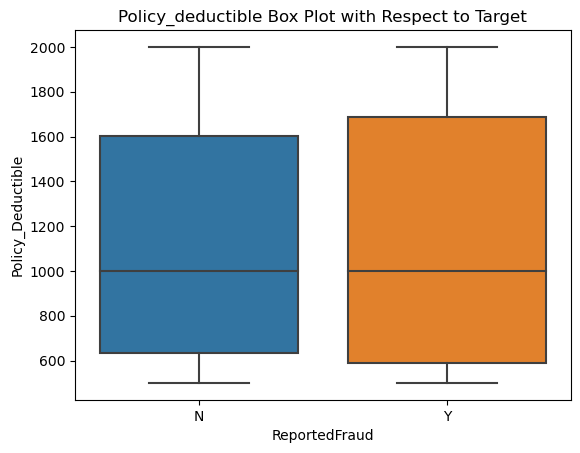

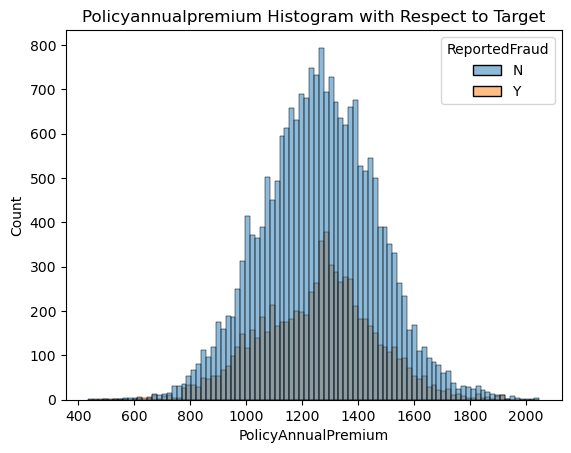

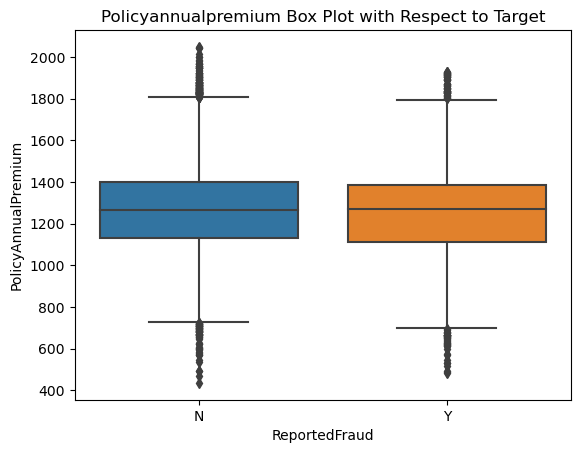

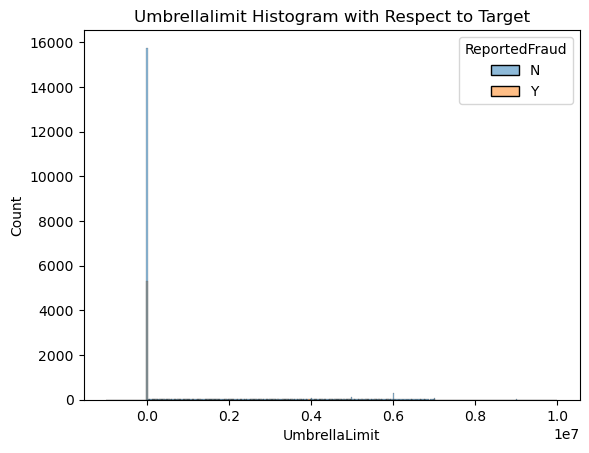

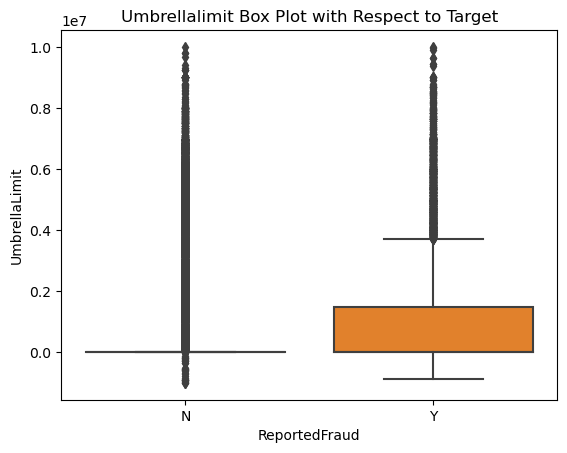

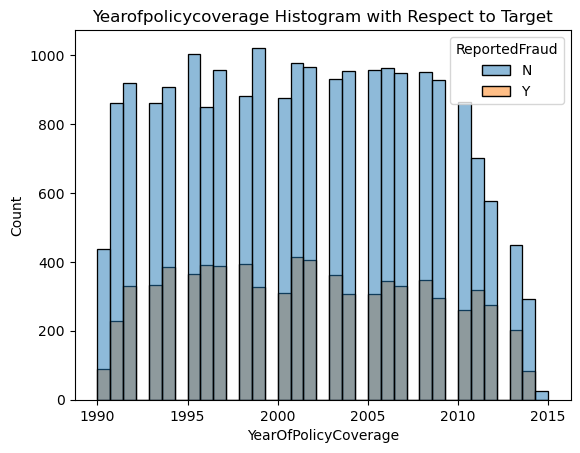

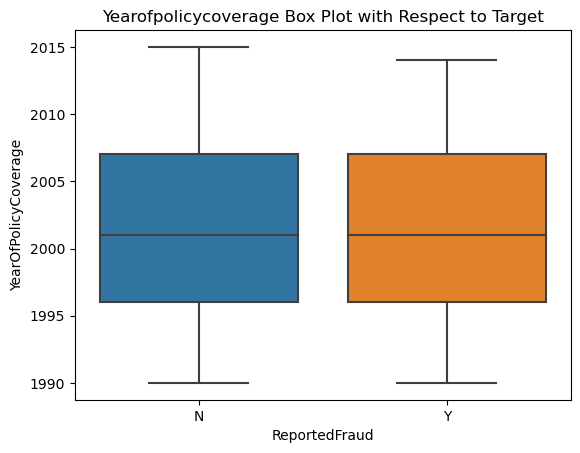

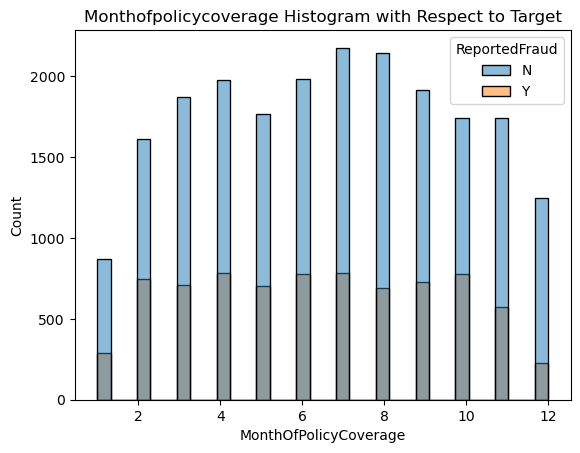

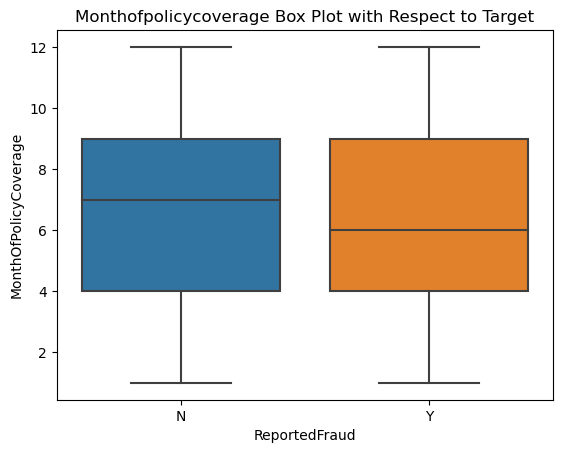

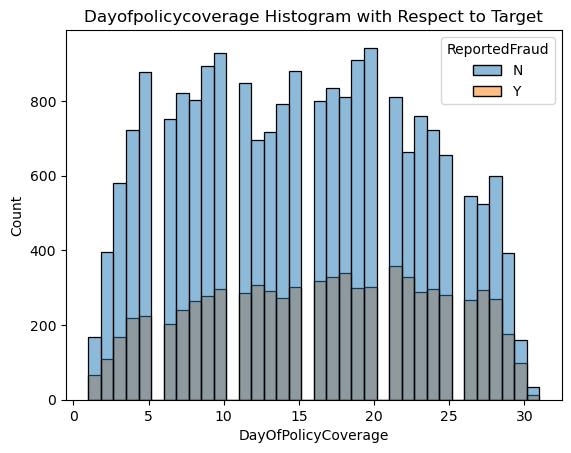

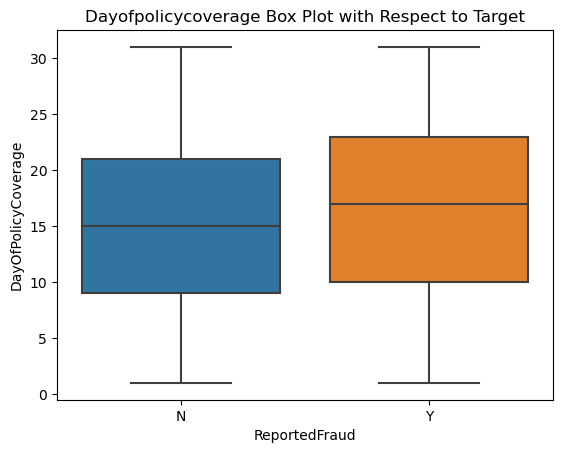

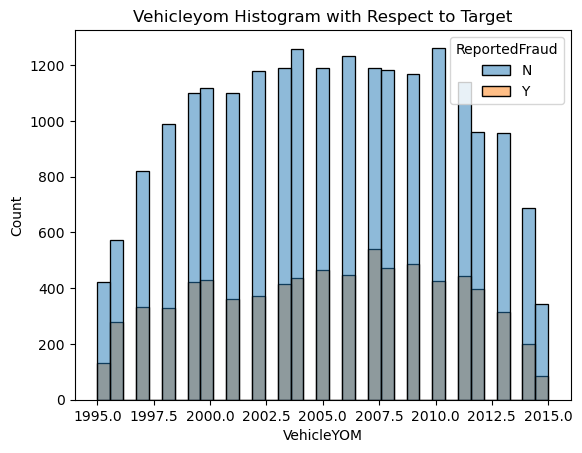

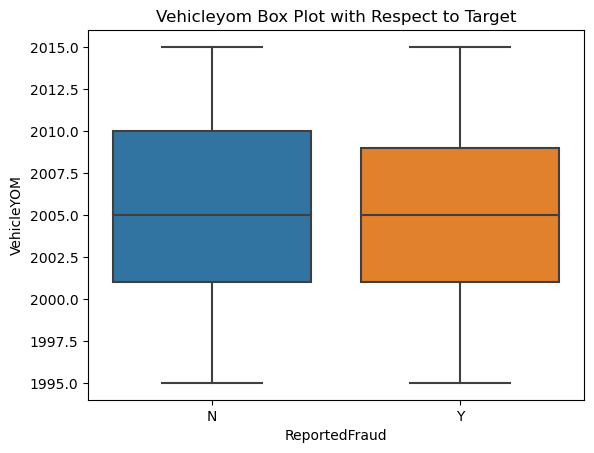

In [72]:
# Loop through all columns except the target column
for col in trained_df.drop("ReportedFraud", axis=1).select_dtypes(include=['float', 'int']).columns:
    # Create histogram for the current column with respect to the target column
    sns.histplot(data=trained_df, x=col, hue="ReportedFraud")
    plt.title(f"{col.capitalize()} Histogram with Respect to Target")
    plt.show()

    # Create box plot for the current column with respect to the target column
    sns.boxplot(data=trained_df, x="ReportedFraud", y=col)
    plt.title(f"{col.capitalize()} Box Plot with Respect to Target")
    plt.show()


In [73]:
trained_df.shape

(28836, 45)

In [74]:
# Calculate the Z-score for each column
z_scores = np.abs((trained_df - trained_df.mean()) / trained_df.std())

# Identify the outlier indices
outlier_indices = (z_scores > 3).any(axis=1)

# Replace the outliers with the median value for each column in the original data
trained_df = trained_df.where(~outlier_indices, trained_df.median(), axis=1)

# Save the cleaned dataset to a new CSV file
trained_df.to_csv('cleaned_df.csv', index=False)
train_df = pd.read_csv('cleaned_df.csv')

In [75]:
train_df['ReportedFraud'].value_counts()

N    20618
Y     7510
Name: ReportedFraud, dtype: int64

## Categorical to Numercial Cnversion using Label Encoding

In [76]:
# select categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# convert the categorical columns to string data type
train_df[categorical_cols] = train_df[categorical_cols].astype(str)

# apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])



In [77]:
train_df['ReportedFraud'] = train_df['ReportedFraud'].replace({2: 1})


In [78]:
train_df['ReportedFraud'].unique() 

array([0, 1])

In [79]:
train_df['ReportedFraud'].value_counts()

0    20618
1     8218
Name: ReportedFraud, dtype: int64

In [80]:
train_df.dtypes


InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                   int32
InsuredEducationLevel           int32
InsuredOccupation               int32
InsuredHobbies                  int32
CapitalGains                    int64
CapitalLoss                     int64
Country                         int32
TypeOfIncident                  int32
TypeOfCollission                int32
SeverityOfIncident              int32
AuthoritiesContacted            int32
IncidentState                   int32
IncidentCity                    int32
IncidentAddress                 int32
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                  int32
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                    int32
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage         float64
YearOfIncide

In [81]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:")
for col in numerical_cols:
    print(f"{col} ({train_df[col].dtype})")

Numerical columns:
InsuredAge (int64)
InsuredZipCode (int64)
InsuredGender (int32)
InsuredEducationLevel (int32)
InsuredOccupation (int32)
InsuredHobbies (int32)
CapitalGains (int64)
CapitalLoss (int64)
Country (int32)
TypeOfIncident (int32)
TypeOfCollission (int32)
SeverityOfIncident (int32)
AuthoritiesContacted (int32)
IncidentState (int32)
IncidentCity (int32)
IncidentAddress (int32)
IncidentTime (float64)
NumberOfVehicles (int64)
PropertyDamage (int32)
BodilyInjuries (int64)
Witnesses (float64)
PoliceReport (int32)
AmountOfTotalClaim (float64)
AmountOfInjuryClaim (int64)
AmountOfPropertyClaim (int64)
AmountOfVehicleDamage (float64)
YearOfIncident (int64)
MonthOfIncident (int64)
DayOfIncident (int64)
InsurancePolicyNumber (float64)
CustomerLoyaltyPeriod (int64)
InsurancePolicyState (int32)
Policy_CombinedSingleLimit (int32)
Policy_Deductible (int64)
PolicyAnnualPremium (float64)
UmbrellaLimit (int64)
InsuredRelationship (int32)
YearOfPolicyCoverage (int64)
MonthOfPolicyCoverage (int

In [82]:
train_df.shape

(28836, 45)

### Plotting Box Plot to Visualize the Outliers

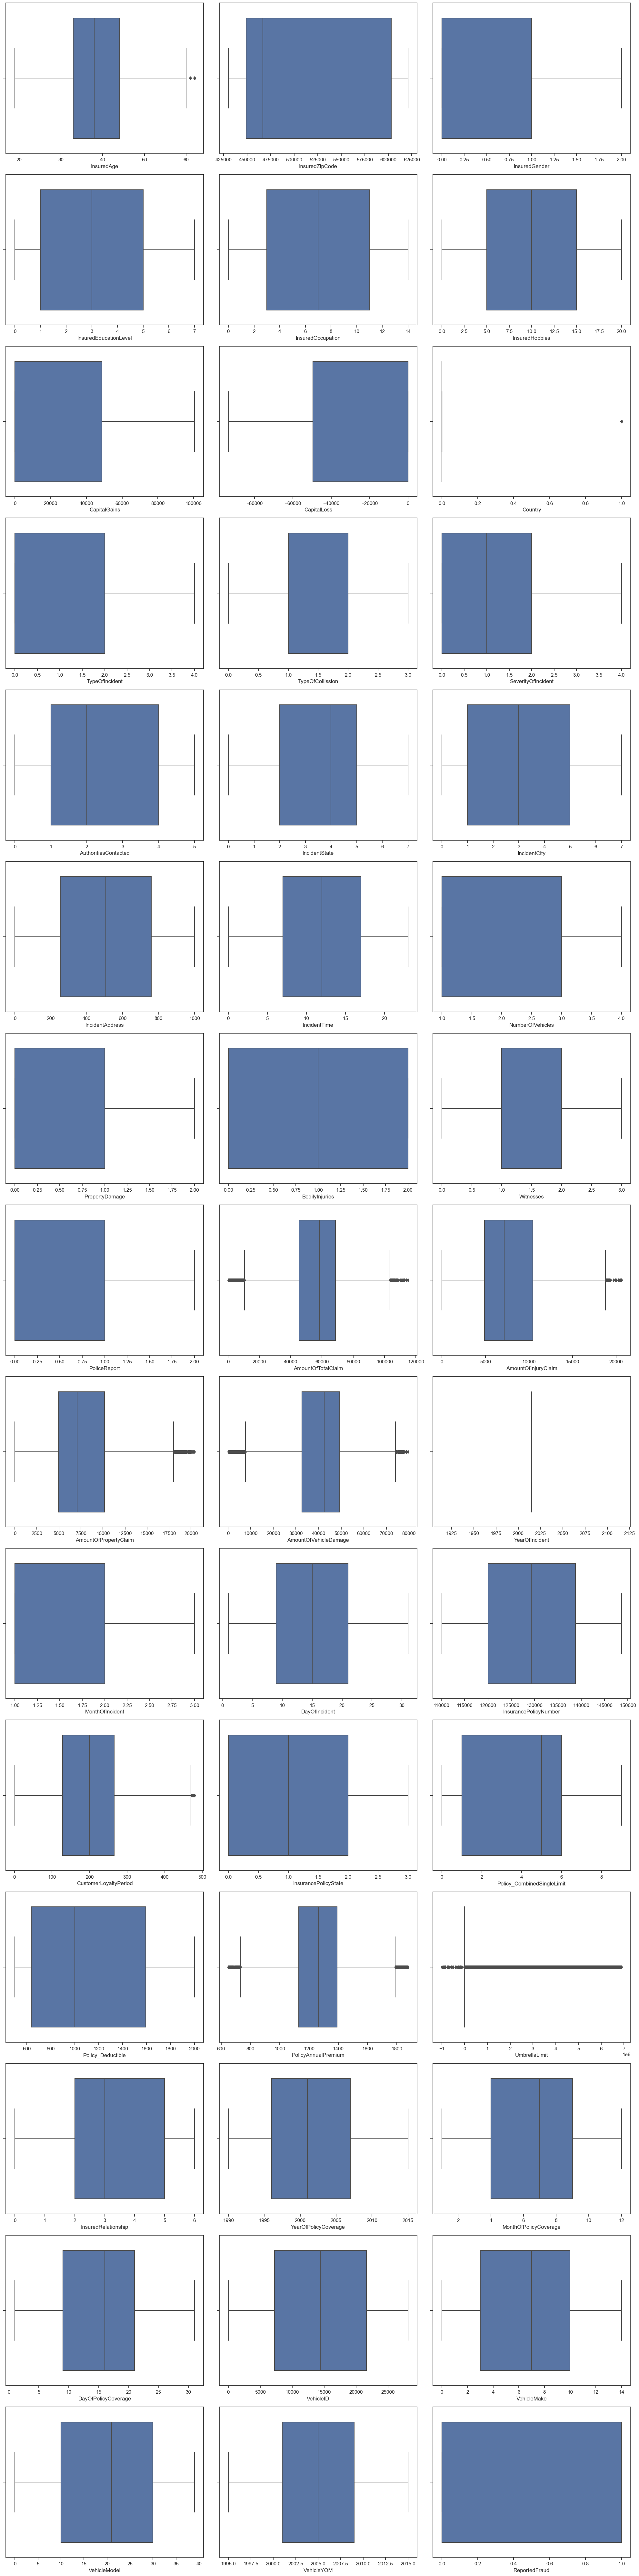

In [83]:
sns.set(style="ticks")
num_cols = len(train_df.columns)
rows = 15
cols = math.ceil(num_cols/rows)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 80))

for i, col in enumerate(train_df.columns):
    row_id = i // cols
    col_id = i % cols
    sns.boxplot(x=train_df[col], ax=axes[row_id, col_id], orient='h')
    axes[row_id, col_id].set_xlabel(col)

plt.tight_layout()
plt.show()


In [84]:
train_df.shape

(28836, 45)

### Plotting a Distplot to find the skewness of the data

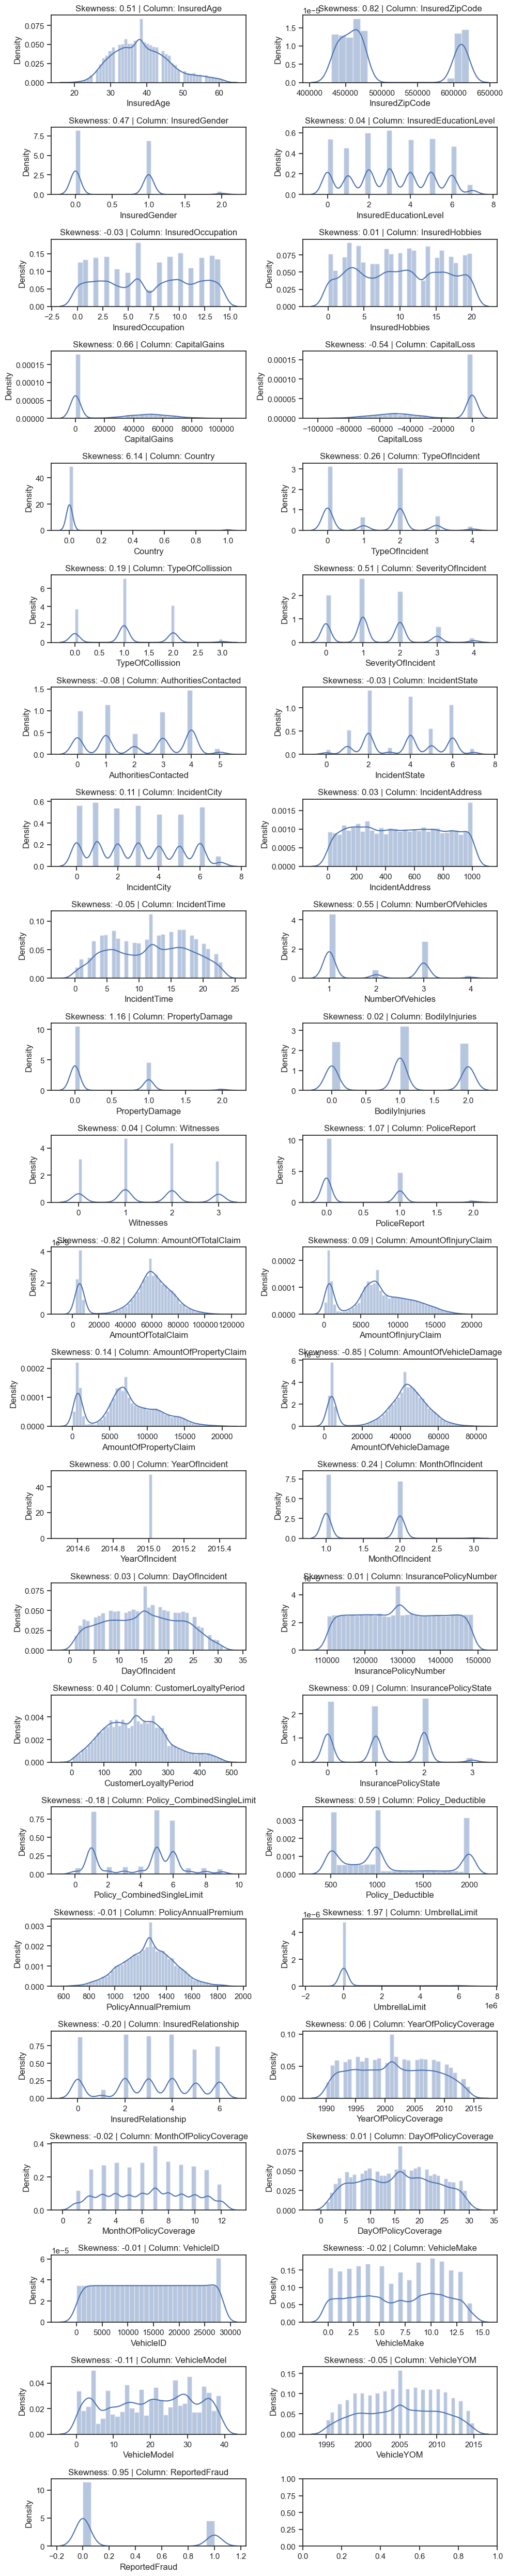

In [85]:
# Get numeric columns in the dataset
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=23, ncols=2, figsize=(10, 50))

# Iterate over each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.distplot(train_df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Skewness: {:.2f} | Column: {}".format(train_df[col].skew(), col))

plt.tight_layout()
plt.show()


### Standardization of the Data

In [86]:
# splitting the data into traget and features
X1 = train_df.drop(["ReportedFraud"], axis = 1)
y1 = train_df["ReportedFraud"]

from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_scaled_train = scaler.fit_transform(X1)

Split the data into training and testing sets

In [87]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y1, test_size=0.3, random_state=42)

### Model Building

### Finding F1 Scores of both Test and Train data and obtaining Predictions

In [88]:
# Define the models to be evaluated
models = [
    ("RandomForestClassifier", RandomForestClassifier()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("GaussianNB", GaussianNB())
]

# Calculate F1 scores for all models
train_f1_scores = []
test_f1_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train, y_pred_train))
    test_f1_scores.append(f1_score(y_test, y_pred_test))

# Create DataFrame to display results
results_df = pd.DataFrame({
    "Model": [name for name, _ in models],
    "Train F1 score": train_f1_scores,
    "Test F1 score": test_f1_scores
})

# Sort the results by Test F1 score in descending order
results_df = results_df.sort_values(by=['Test F1 score'], ascending=False)

print(results_df)



                    Model  Train F1 score  Test F1 score
2    KNeighborsClassifier        0.899545       0.891394
0  RandomForestClassifier        1.000000       0.877085
1  DecisionTreeClassifier        1.000000       0.766747
3      LogisticRegression        0.688801       0.664355
4              GaussianNB        0.160470       0.154255


# Loading Test Datasets

### 1. Loading Test_Demographics Dataset

In [89]:
Test_demo = pd.read_csv('Test_Demographics.csv',na_values=['NA'])

In [90]:
Test_demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


In [91]:
Test_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             8912 non-null   object
 1   InsuredAge             8912 non-null   int64 
 2   InsuredZipCode         8912 non-null   int64 
 3   InsuredGender          8904 non-null   object
 4   InsuredEducationLevel  8912 non-null   object
 5   InsuredOccupation      8912 non-null   object
 6   InsuredHobbies         8912 non-null   object
 7   CapitalGains           8912 non-null   int64 
 8   CapitalLoss            8912 non-null   int64 
 9   Country                8908 non-null   object
dtypes: int64(4), object(6)
memory usage: 696.4+ KB


In [92]:
Test_demo.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss
count,8912.000000,8912.000000,8912.000000,8912.000000
mean,38.743492,501558.312949,23413.004937,-25365.888689
std,7.914619,72051.904910,27821.325212,28032.959284
min,19.000000,430104.000000,0.000000,-111100.000000
25%,33.000000,447469.000000,0.000000,-50400.000000
50%,38.000000,466303.000000,0.000000,0.000000
75%,44.000000,603527.000000,49900.000000,0.000000
max,64.000000,620962.000000,100500.000000,0.000000


In [93]:
Test_demo.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country'],
      dtype='object')

In [94]:
Test_demo.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            8
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  4
dtype: int64

In [95]:
Test_demo[['InsuredGender','Country']] = Test_demo[['InsuredGender','Country']].fillna(Test_demo.mode().iloc[0])
Test_demo.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

In [96]:
Test_demo.shape

(8912, 10)

### 2. Loading Test_Claim Dataset

In [97]:
Test_claim = pd.read_csv('Test_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])

In [98]:
Test_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100


In [99]:
# Convert the DateOfPolicyCoverage column to datetime format
Test_claim['DateOfIncident'] = pd.to_datetime(Test_claim['DateOfIncident'])

# Extract year, month, and day as separate columns
Test_claim['Year'] = Test_claim['DateOfIncident'].dt.year
Test_claim['Month'] = Test_claim['DateOfIncident'].dt.month
Test_claim['Day'] = Test_claim['DateOfIncident'].dt.day
Test_claim.drop('DateOfIncident', axis=1, inplace=True)

In [100]:
# rename attributes
Test_claim = Test_claim.rename(columns={"Year": "YearOfIncident", "Month": "MonthOfIncident", "Day": "DayOfIncident"})

In [101]:
Test_claim.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident
0,Cust10008,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,...,0,0.0,NaN,68354.0,6835,8059,53460,2015,2,5
1,Cust10010,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,...,1,1.0,NaN,55270.0,8113,5240,41917,2015,1,13
2,Cust10015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,...,0,1.0,NaN,59515.0,7490,9110,42915,2015,1,5
3,Cust10020,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,...,2,1.0,NaN,4941.0,494,866,3581,2015,1,3
4,Cust1003,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,...,2,3.0,NO,34650.0,7700,3850,23100,2015,2,22


In [102]:
Test_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             8912 non-null   object 
 1   TypeOfIncident         8912 non-null   object 
 2   TypeOfCollission       7149 non-null   object 
 3   SeverityOfIncident     8912 non-null   object 
 4   AuthoritiesContacted   8912 non-null   object 
 5   IncidentState          8912 non-null   object 
 6   IncidentCity           8912 non-null   object 
 7   IncidentAddress        8912 non-null   object 
 8   IncidentTime           8905 non-null   float64
 9   NumberOfVehicles       8912 non-null   int64  
 10  PropertyDamage         5713 non-null   object 
 11  BodilyInjuries         8912 non-null   int64  
 12  Witnesses              8900 non-null   float64
 13  PoliceReport           5898 non-null   object 
 14  AmountOfTotalClaim     8904 non-null   float64
 15  Amou

In [103]:
Test_claim.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident
count,8905.000000,8912.000000,8912.000000,8900.000000,8904.000000,8912.000000,8912.000000,8912.000000,8912.0,8912.000000,8912.000000
mean,11.785963,1.801616,0.988330,1.494157,51092.660827,7214.076750,7114.529286,36761.520646,2015.0,1.498541,15.183797
std,6.157104,0.972594,0.783827,1.046545,25653.520520,4447.763373,4367.824773,18381.523101,0.0,0.514189,7.605576
min,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,2015.0,1.000000,1.000000
25%,6.000000,1.000000,0.000000,1.000000,42288.250000,4409.000000,4508.250000,30215.750000,2015.0,1.000000,9.000000
50%,12.000000,1.000000,1.000000,1.000000,57770.500000,7133.500000,6988.500000,41913.000000,2015.0,1.000000,15.000000
75%,17.000000,3.000000,2.000000,2.000000,68518.250000,10378.500000,10184.500000,49222.000000,2015.0,2.000000,21.000000
max,23.000000,4.000000,2.000000,3.000000,112320.000000,20989.000000,23498.000000,77760.000000,2015.0,3.000000,31.000000


In [104]:
Test_claim.columns

Index(['CustomerID', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'YearOfIncident', 'MonthOfIncident',
       'DayOfIncident'],
      dtype='object')

In [105]:
Test_claim.isnull().sum()

CustomerID                  0
TypeOfIncident              0
TypeOfCollission         1763
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
YearOfIncident              0
MonthOfIncident             0
DayOfIncident               0
dtype: int64

In [106]:
for col in ['TypeOfCollission', 'IncidentTime', 'PropertyDamage', 'Witnesses', 'PoliceReport']:
    print(Test_claim[col].value_counts())


Rear Collision     2602
Side Collision     2388
Front Collision    2159
Name: TypeOfCollission, dtype: int64
17.0    512
16.0    506
6.0     489
5.0     455
4.0     441
15.0    440
7.0     439
12.0    435
14.0    432
18.0    426
13.0    425
9.0     421
19.0    382
8.0     382
3.0     373
20.0    367
10.0    366
11.0    362
21.0    303
22.0    257
1.0     222
2.0     186
23.0    184
0.0     100
Name: IncidentTime, dtype: int64
NO     3039
YES    2674
Name: PropertyDamage, dtype: int64
1.0    2605
2.0    2534
0.0    1886
3.0    1875
Name: Witnesses, dtype: int64
NO     3055
YES    2843
Name: PoliceReport, dtype: int64


In [107]:
Test_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']] = Test_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']].fillna(Test_claim.mode().iloc[0])
Test_claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']] = Test_claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']].fillna(Test_claim.median())
Test_claim.isnull().sum()

CustomerID               0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
YearOfIncident           0
MonthOfIncident          0
DayOfIncident            0
dtype: int64

In [108]:
Test_claim.shape

(8912, 21)

### 3. Loading Test_Policy Dataset

In [109]:
Test_policy = pd.read_csv('Test_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])

In [110]:
Test_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


In [111]:
# Convert the DateOfPolicyCoverage column to datetime format
Test_policy['DateOfPolicyCoverage'] = pd.to_datetime(Test_policy['DateOfPolicyCoverage'])

# Extract year, month, and day as separate columns
Test_policy['Year'] = Test_policy['DateOfPolicyCoverage'].dt.year
Test_policy['Month'] = Test_policy['DateOfPolicyCoverage'].dt.month
Test_policy['Day'] = Test_policy['DateOfPolicyCoverage'].dt.day
Test_policy.drop('DateOfPolicyCoverage', axis=1, inplace=True)

In [112]:
# rename attributes
Test_policy = Test_policy.rename(columns={"Year": "YearOfPolicyCoverage", "Month": "MonthOfPolicyCoverage", "Day": "DayOfPolicyCoverage"})

In [113]:
Test_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
0,110124,134,State3,100/300,2000,1413.14,5000000,own-child,Cust1003,2000,9,6
1,110129,165,State1,100/300,1000,1137.03,0,unmarried,Cust1008,1990,2,3
2,110137,473,State2,100/300,2000,1131.40,0,other-relative,Cust1016,1992,10,19
3,110140,160,State3,500/1000,500,1374.22,0,other-relative,Cust1019,2014,12,28
4,110141,196,State2,500/1000,2000,1475.73,0,own-child,Cust1020,1992,8,2


In [114]:
Test_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       8912 non-null   int64  
 1   CustomerLoyaltyPeriod       8912 non-null   int64  
 2   InsurancePolicyState        8912 non-null   object 
 3   Policy_CombinedSingleLimit  8912 non-null   object 
 4   Policy_Deductible           8912 non-null   int64  
 5   PolicyAnnualPremium         8865 non-null   float64
 6   UmbrellaLimit               8912 non-null   int64  
 7   InsuredRelationship         8912 non-null   object 
 8   CustomerID                  8912 non-null   object 
 9   YearOfPolicyCoverage        8912 non-null   int64  
 10  MonthOfPolicyCoverage       8912 non-null   int64  
 11  DayOfPolicyCoverage         8912 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 835.6+ KB


In [115]:
Test_policy.describe()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
count,8912.000000,8912.000000,8912.000000,8865.000000,8.912000e+03,8912.000000,8912.000000,8912.000000
mean,130481.939295,203.055206,1123.580790,1260.235059,9.318594e+05,2001.441764,6.656979,15.289497
std,10879.022180,98.423250,553.139684,205.534081,1.919603e+06,6.595158,3.142099,7.677172
min,110124.000000,0.000000,500.000000,433.330000,-8.836920e+05,1990.000000,1.000000,1.000000
25%,121312.500000,127.000000,622.000000,1119.460000,0.000000e+00,1996.000000,4.000000,9.000000
50%,130807.000000,199.000000,1000.000000,1265.840000,0.000000e+00,2001.000000,7.000000,15.000000
75%,139904.000000,265.000000,1691.250000,1399.240000,2.836810e+05,2007.000000,9.000000,21.000000
max,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06,2015.000000,12.000000,31.000000


In [116]:
Test_policy.columns

Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'InsuredRelationship', 'CustomerID', 'YearOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'DayOfPolicyCoverage'],
      dtype='object')

In [117]:
Test_policy.shape

(8912, 12)

In [118]:
Test_policy.isnull().sum()

InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           47
UmbrellaLimit                  0
InsuredRelationship            0
CustomerID                     0
YearOfPolicyCoverage           0
MonthOfPolicyCoverage          0
DayOfPolicyCoverage            0
dtype: int64

In [119]:
Test_policy['PolicyAnnualPremium'].fillna(Test_policy['PolicyAnnualPremium'].median(), inplace=True)
print(Test_policy.isnull().sum())

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
YearOfPolicyCoverage          0
MonthOfPolicyCoverage         0
DayOfPolicyCoverage           0
dtype: int64


### 4. Loading Test_Vehicle Dataset

In [120]:
Test_vec = pd.read_csv('Test_Vehicle.csv',na_values=['???'])

In [121]:
Test_vec.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


In [122]:
Test_vec = Test_vec.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [123]:
Test_vec.columns = Test_vec.columns.droplevel(0) 
Test_vec.columns.name = None               
Test_vec = Test_vec.reset_index()

In [124]:
Test_vec.head()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,Vehicle37114,Accura,TL,2009
4,Cust1003,Vehicle16771,Dodge,RAM,2007


In [125]:
Test_vec.shape

(8912, 5)

In [126]:
Test_vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    8912 non-null   object
 1   VehicleID     8912 non-null   object
 2   VehicleMake   8904 non-null   object
 3   VehicleModel  8912 non-null   object
 4   VehicleYOM    8912 non-null   object
dtypes: object(5)
memory usage: 348.2+ KB


In [127]:
Test_vec.describe()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
count,8912,8912,8904,8912,8912
unique,8912,8912,14,38,21
top,Cust10008,Vehicle34362,Suburu,Wrangler,2010
freq,1,1,743,507,544


In [128]:
Test_vec.columns

Index(['CustomerID', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object')

In [129]:
Test_vec.shape

(8912, 5)

In [130]:
Test_vec.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     8
VehicleModel    0
VehicleYOM      0
dtype: int64

In [131]:
Test_vec[['VehicleMake']] = Test_vec[['VehicleMake']].fillna(Test_vec.mode().iloc[0])
print(Test_vec.isnull().sum())

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64


### 5. Loading Test Dataset

In [132]:
Test_fraud = pd.read_csv('Test.csv')

In [133]:
Test_fraud.head()

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003


In [134]:
Test_fraud.shape

(8912, 1)

## Merge the Datasets

In [135]:
# merge the datasets on a common variable
test_dc = pd.merge(Test_demo,Test_claim, on='CustomerID')

In [136]:
test_pv = pd.merge(Test_policy,Test_vec, on='CustomerID')

In [137]:
test_dcpv = pd.merge(test_dc,test_pv,on='CustomerID' )

In [138]:
test_df = pd.merge(test_dcpv,Test_fraud,on='CustomerID' )

In [139]:
test_df.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'YearOfIncident',
       'MonthOfIncident', 'DayOfIncident', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'YearOfPolicyCoverage', 'MonthOfPolicyCoverage', 'DayOfPolicyCoverage',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [140]:
# Save the dataframe as a new CSV file
test_df.to_csv('data_test.csv', index=False)
tested_df = pd.read_csv('data_test.csv')

In [141]:
tested_df.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'YearOfIncident',
       'MonthOfIncident', 'DayOfIncident', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'YearOfPolicyCoverage', 'MonthOfPolicyCoverage', 'DayOfPolicyCoverage',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [142]:
CustomerIDs = tested_df["CustomerID"] # store the "CustomerID" column in a separate variable
tested_df.drop("CustomerID", axis=1, inplace=True) # drop the "CustomerID" column from the "test_df" DataFrame
tested_df.to_csv('tested_df',index=False)
test_df = pd.read_csv('tested_df')

In [143]:
test_df.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,...,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,Multi-vehicle Collision,...,1006.00,0,own-child,1998,5,10,Vehicle34362,Volkswagen,Passat,1995
1,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,Single Vehicle Collision,...,1279.17,0,unmarried,2011,11,10,Vehicle17046,Nissan,Ultima,2006
2,39,461919,MALE,JD,other-service,movies,30400,0,India,Multi-vehicle Collision,...,1454.67,1235986,other-relative,2010,7,17,Vehicle11038,Suburu,Impreza,2010
3,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,Vehicle Theft,...,1287.76,5873212,wife,2000,9,10,Vehicle37114,Accura,TL,2009
4,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,Multi-vehicle Collision,...,1413.14,5000000,own-child,2000,9,6,Vehicle16771,Dodge,RAM,2007


In [144]:
test_df.tail()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,...,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
8907,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,Single Vehicle Collision,...,1104.02,1959277,wife,1997,10,23,Vehicle19062,Saab,95,2000
8908,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,Single Vehicle Collision,...,961.46,0,husband,2001,8,16,Vehicle18191,Saab,92x,2000
8909,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,Single Vehicle Collision,...,1560.49,0,wife,2003,4,14,Vehicle11032,BMW,Civic,1998
8910,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,Single Vehicle Collision,...,1577.48,0,wife,1992,8,21,Vehicle30412,Jeep,Grand Cherokee,2002
8911,38,450730,FEMALE,PhD,handlers-cleaners,video-games,51500,-74300,India,Single Vehicle Collision,...,928.75,3701890,husband,2002,3,13,Vehicle2349,Suburu,E400,2007


In [145]:
test_df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,...,DayOfIncident,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleYOM
count,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,...,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8.912000e+03,8912.000000,8912.000000,8912.000000,8912.000000
mean,38.743492,501558.312949,23413.004937,-25365.888689,11.786131,1.801616,0.988330,1.493492,51098.655296,7214.076750,...,15.183797,130481.939295,203.055206,1123.580790,1260.264618,9.318594e+05,2001.441764,6.656979,15.289497,2005.099417
std,7.914619,72051.904910,27821.325212,28032.959284,6.154688,0.972594,0.783827,1.045998,25642.782427,4447.763373,...,7.605576,10879.022180,98.423250,553.139684,204.991734,1.919603e+06,6.595158,3.142099,7.677172,5.312139
min,19.000000,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,...,1.000000,110124.000000,0.000000,500.000000,433.330000,-8.836920e+05,1990.000000,1.000000,1.000000,1995.000000
25%,33.000000,447469.000000,0.000000,-50400.000000,6.000000,1.000000,0.000000,1.000000,42303.000000,4409.000000,...,9.000000,121312.500000,127.000000,622.000000,1120.035000,0.000000e+00,1996.000000,4.000000,9.000000,2001.000000
50%,38.000000,466303.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,57770.500000,7133.500000,...,15.000000,130807.000000,199.000000,1000.000000,1265.840000,0.000000e+00,2001.000000,7.000000,15.000000,2005.000000
75%,44.000000,603527.000000,49900.000000,0.000000,17.000000,3.000000,2.000000,2.000000,68506.250000,10378.500000,...,21.000000,139904.000000,265.000000,1691.250000,1398.722500,2.836810e+05,2007.000000,9.000000,21.000000,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,112320.000000,20989.000000,...,31.000000,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06,2015.000000,12.000000,31.000000,2015.000000


In [146]:
test_df.shape

(8912, 44)

In [147]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsuredAge                  8912 non-null   int64  
 1   InsuredZipCode              8912 non-null   int64  
 2   InsuredGender               8912 non-null   object 
 3   InsuredEducationLevel       8912 non-null   object 
 4   InsuredOccupation           8912 non-null   object 
 5   InsuredHobbies              8912 non-null   object 
 6   CapitalGains                8912 non-null   int64  
 7   CapitalLoss                 8912 non-null   int64  
 8   Country                     8912 non-null   object 
 9   TypeOfIncident              8912 non-null   object 
 10  TypeOfCollission            8912 non-null   object 
 11  SeverityOfIncident          8912 non-null   object 
 12  AuthoritiesContacted        8912 non-null   object 
 13  IncidentState               8912 

### Checking for Missing values

In [148]:
test_df.isnull().sum().sum()

0

#### Displaying both Numerical and Categorical Columns

In [149]:
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:")
for col in numerical_cols:
    print(f"{col} ({test_df[col].dtype})")

print("\nCategorical columns:")
for col in categorical_cols:
    print(f"{col} ({test_df[col].dtype})")


Numerical columns:
InsuredAge (int64)
InsuredZipCode (int64)
CapitalGains (int64)
CapitalLoss (int64)
IncidentTime (float64)
NumberOfVehicles (int64)
BodilyInjuries (int64)
Witnesses (float64)
AmountOfTotalClaim (float64)
AmountOfInjuryClaim (int64)
AmountOfPropertyClaim (int64)
AmountOfVehicleDamage (int64)
YearOfIncident (int64)
MonthOfIncident (int64)
DayOfIncident (int64)
InsurancePolicyNumber (int64)
CustomerLoyaltyPeriod (int64)
Policy_Deductible (int64)
PolicyAnnualPremium (float64)
UmbrellaLimit (int64)
YearOfPolicyCoverage (int64)
MonthOfPolicyCoverage (int64)
DayOfPolicyCoverage (int64)
VehicleYOM (int64)

Categorical columns:
InsuredGender (object)
InsuredEducationLevel (object)
InsuredOccupation (object)
InsuredHobbies (object)
Country (object)
TypeOfIncident (object)
TypeOfCollission (object)
SeverityOfIncident (object)
AuthoritiesContacted (object)
IncidentState (object)
IncidentCity (object)
IncidentAddress (object)
PropertyDamage (object)
PoliceReport (object)
Insurance

### Converting Categorical to Numerical

In [150]:
# select categorical columns
categorical_cols = test_df.select_dtypes(include='object').columns.tolist()

# convert the categorical columns to string data type
test_df[categorical_cols] = test_df[categorical_cols].astype(str)

# apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    test_df[col] = encoder.fit_transform(test_df[col])



### Calculate and Replace the outliers with the median value using Zscore

In [151]:
#Calculate the Z-score for each column
z_scores = np.abs((test_df - test_df.mean()) / test_df.std())

# Identify the outlier indices
outlier_indices = (z_scores > 3).any(axis=1)

# Replace the outliers with the median value for each column in the original data
test_df[outlier_indices] = test_df.median()

# Save the cleaned dataset to a new CSV file (optional)
test_df.to_csv('cleaned_train_df.csv', index=False)
tested_df = pd.read_csv('cleaned_train_df.csv')

In [152]:
tested_df.dtypes

InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                   int64
InsuredEducationLevel           int64
InsuredOccupation               int64
InsuredHobbies                  int64
CapitalGains                    int64
CapitalLoss                     int64
Country                         int64
TypeOfIncident                  int64
TypeOfCollission                int64
SeverityOfIncident              int64
AuthoritiesContacted            int64
IncidentState                   int64
IncidentCity                    int64
IncidentAddress                 int64
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                  int64
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                    int64
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfPropertyClaim         float64
AmountOfVehicleDamage           int64
YearOfIncide

In [153]:
tested_df.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,...,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,27,471704,0,2,0,0,56400,-57000,0,0,...,1006.00,0,3,1998,5,10,6131.0,13,28,1995
1,40,455810,0,4,9,9,56700,-65600,0,2,...,1279.17,0,4,2011,11,10,1712.0,9,34,2006
2,39,461919,1,3,7,12,30400,0,0,0,...,1454.67,1235986,2,2010,7,17,239.0,11,19,2010
3,38,600904,0,5,3,18,68500,0,0,3,...,1287.76,5873212,5,2000,9,10,6816.0,0,32,2009
4,29,430632,0,6,11,2,35100,0,0,0,...,1413.14,5000000,3,2000,9,6,1637.0,4,30,2007


In [154]:
tested_df.shape

(8912, 44)

#### Standardization of the data

In [155]:
X2 = tested_df

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
X2_scaled=pd.DataFrame(X2_scaled)

### Pedicting from  RandomForestClassifier model

In [156]:
# Train a random forest model on the data
Rc = RandomForestClassifier()
Rc.fit(X_scaled_train, y1)

# Create a pickle file for the model
with open('RandomForestClassifier_model.pkl', 'wb') as f:
    pickle.dump(Rc, f)

X2_scaled.columns = [str(col) for col in X2_scaled.columns] # convert all column names to strings

# Load the random forest model from the pickle file
with open('RandomForestClassifier_model.pkl', 'rb') as f:
    RandomForestClassifier_model = pickle.load(f)

# Make predictions on the test data using the random forest model
pred = RandomForestClassifier_model.predict(X2_scaled)
print(f"Prediction from random forest model: {pred}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_RandomForest.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from random forest model: [0 0 1 ... 0 1 0]


### Hypertuining

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score
import numpy as np

# Define the random forest model
model = RandomForestClassifier()

# Define the hyperparameters to be tuned
params = {
    "n_estimators": np.arange(100, 1000, 100),
    "max_depth": [10, 20, 30, None],
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 5),
    "max_features": ["auto", "sqrt", "log2"]
}

# Use RandomizedSearchCV to hypertune the model
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=10,
    scoring="f1",
    random_state=42,
    verbose=1,
    n_jobs=-1,
)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred_test)
print("Test F1 score:", f1)

# Save the best model to a pickle file
with open("RandomForestClassifier_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Create a DataFrame with CustomerID and predicted labels
X2_scaled.columns = [str(col) for col in X2_scaled.columns]
pred = best_model.predict(X2_scaled)
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_RandomForest.csv'
results_df.to_csv(results_file_name, index=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 700, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
F1 score: 0.8740546109255657
Test F1 score: 0.8785416209092906


In [158]:
# Load the best model from the pickle file
with open('RandomForestClassifier_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Make predictions on the new data using the best model
pred = best_model.predict(X2_scaled)
print(f"Prediction from best model: {pred}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_best_model.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from best model: [0 0 1 ... 0 1 1]


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score
import numpy as np

# Define the decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameters to be tuned
params = {
    "max_depth": [10, 20, 30, None],
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 5),
    "max_features": ["auto", "sqrt", "log2"]
}

# Use RandomizedSearchCV to hypertune the model
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=10,
    scoring="f1",
    random_state=42,
    verbose=1,
    n_jobs=-1,
)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred_test)
print("Test F1 score:", f1)

# Save the best model to a pickle file
with open("DecisionTreeClassifier_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Create a DataFrame with CustomerID and predicted labels
X2_scaled.columns = [str(col) for col in X2_scaled.columns]
pred = best_model.predict(X2_scaled)
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_DecisionTree.csv'
results_df.to_csv(results_file_name, index=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
F1 score: 0.7617150621162869
Test F1 score: 0.7508474576271187


In [160]:
# Load the best model from the pickle file
with open('DecisionTreeClassifier_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Make predictions on the new data using the best model
pred = best_model.predict(X2_scaled)
print(f"Prediction from DecisionTreeClassifier model: {pred}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'DecisionTreeClassifier_Predictions_best_model.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from DecisionTreeClassifier model: [1 1 1 ... 0 0 0]


In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score
import numpy as np

# Define the KNN model
model = KNeighborsClassifier()

# Define the hyperparameters to be tuned
params = {
    "n_neighbors": np.arange(1, 21, 2),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# Use RandomizedSearchCV to hypertune the model
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=10,
    scoring="f1",
    random_state=42,
    verbose=1,
    n_jobs=-1,
)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred_test)
print("Test F1 score:", f1)

# Save the best model to a pickle file
with open("KNeighborsClassifier_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Create a DataFrame with CustomerID and predicted labels
X2_scaled.columns = [str(col) for col in X2_scaled.columns]
pred = best_model.predict(X2_scaled)
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_KNeighbors.csv'
results_df.to_csv(results_file_name, index=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 9}
F1 score: 0.8989360931804675
Test F1 score: 0.898657427457774


In [163]:
# Load the best model from the pickle file
with open('KNeighborsClassifier_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Make predictions on the new data using the best model
pred = best_model.predict(X2_scaled)
print(f"Prediction from KNeighborsClassifier model: {pred}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'KNeighborsClassifier_Predictions_best_model.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from KNeighborsClassifier model: [0 0 0 ... 0 0 0]


In [164]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Define the hyperparameters to be tuned
params = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "saga"]
}

# Use RandomizedSearchCV to hypertune the model
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=10,
    scoring="f1",
    random_state=42,
    verbose=1,
    n_jobs=-1,
)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred_test)
print("Test F1 score:", f1)

# Save the best model to a pickle file
with open("LogisticRegression_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Create a DataFrame with CustomerID and predicted labels
X2_scaled.columns = [str(col) for col in X2_scaled.columns]
pred = best_model.predict(X2_scaled)
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_LogisticRegression.csv'
results_df.to_csv(results_file_name, index=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1}
F1 score: 0.6863329760181216
Test F1 score: 0.6642015253062169


In [165]:
# Load the best model from the pickle file
with open('LogisticRegression_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Make predictions on the new data using the best model
pred = best_model.predict(X2_scaled)
print(f"Prediction from LogisticRegression model: {pred}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'LogisticRegression_Predictions_best_model.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from LogisticRegression model: [1 1 1 ... 1 1 1]


In [166]:
from sklearn.naive_bayes import GaussianNB

# Define the GNB model
model = GaussianNB()

# Define the hyperparameters to be tuned
params = {
    "var_smoothing": [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

# Use RandomizedSearchCV to hypertune the model
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=10,
    scoring="f1",
    random_state=42,
    verbose=1,
    n_jobs=-1,
)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)

# Make predictions on the test data using the best model
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred_test)
print("Test F1 score:", f1)

# Save the best model to a pickle file
with open("GaussianNB_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Create a DataFrame with CustomerID and predicted labels
X2_scaled.columns = [str(col) for col in X2_scaled.columns]
pred = best_model.predict(X2_scaled)
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'Predictions_GaussianNB.csv'
results_df.to_csv(results_file_name, index=False)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'var_smoothing': 1e-09}
F1 score: 0.1605129982073
Test F1 score: 0.15425531914893617


In [167]:
# Load the best model from the pickle file
with open('GaussianNB_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Make predictions on the new data using the best model
pred = best_model.predict(X2_scaled)
print(f"Prediction from GaussianNB model: {pred}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': CustomerIDs, 'ReportedFraud': pred})

# Save the results to a CSV file
results_file_name = 'GaussianNB_Predictions_best_model.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from GaussianNB model: [0 1 1 ... 1 1 1]
